<a href="https://colab.research.google.com/github/pentakll4002/dbscan/blob/main/IsolationForest_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(n_samples=2000, factor=0.3, noise=0.1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
cluster = iso.fit_predict(X_train)

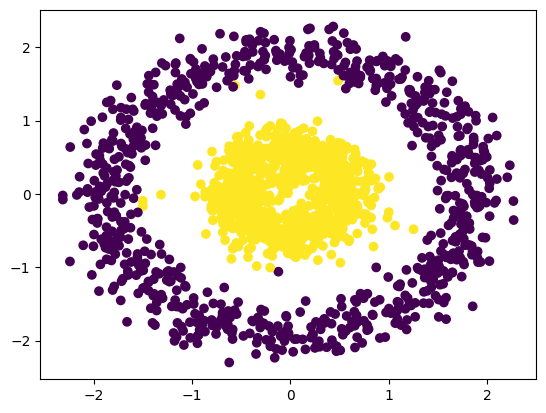

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# defining parameter range
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0],
    'contamination': [0.1, 0.2, 0.3],
    'random_state': [42]
}

In [28]:
def scoring_function(estimator, X):
    y_pred = estimator.predict(X)
    return (y_pred == -1).sum()

custom_scorer = make_scorer(scoring_function, greater_is_better=True)

In [31]:
grid = GridSearchCV(estimator=iso, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, refit=True, scoring=custom_scorer)
grid.fit(X_train)

best_model = grid.best_estimator_

cluster = best_model.predict(X_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


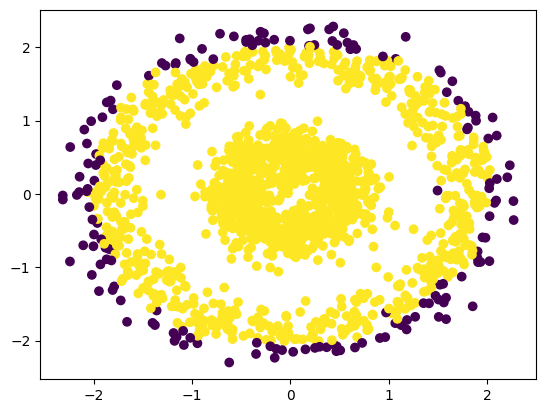

In [32]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster)
plt.show()